In [176]:
import numpy as np
from tqdm.notebook import tqdm
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import cv2 as cv

import utils

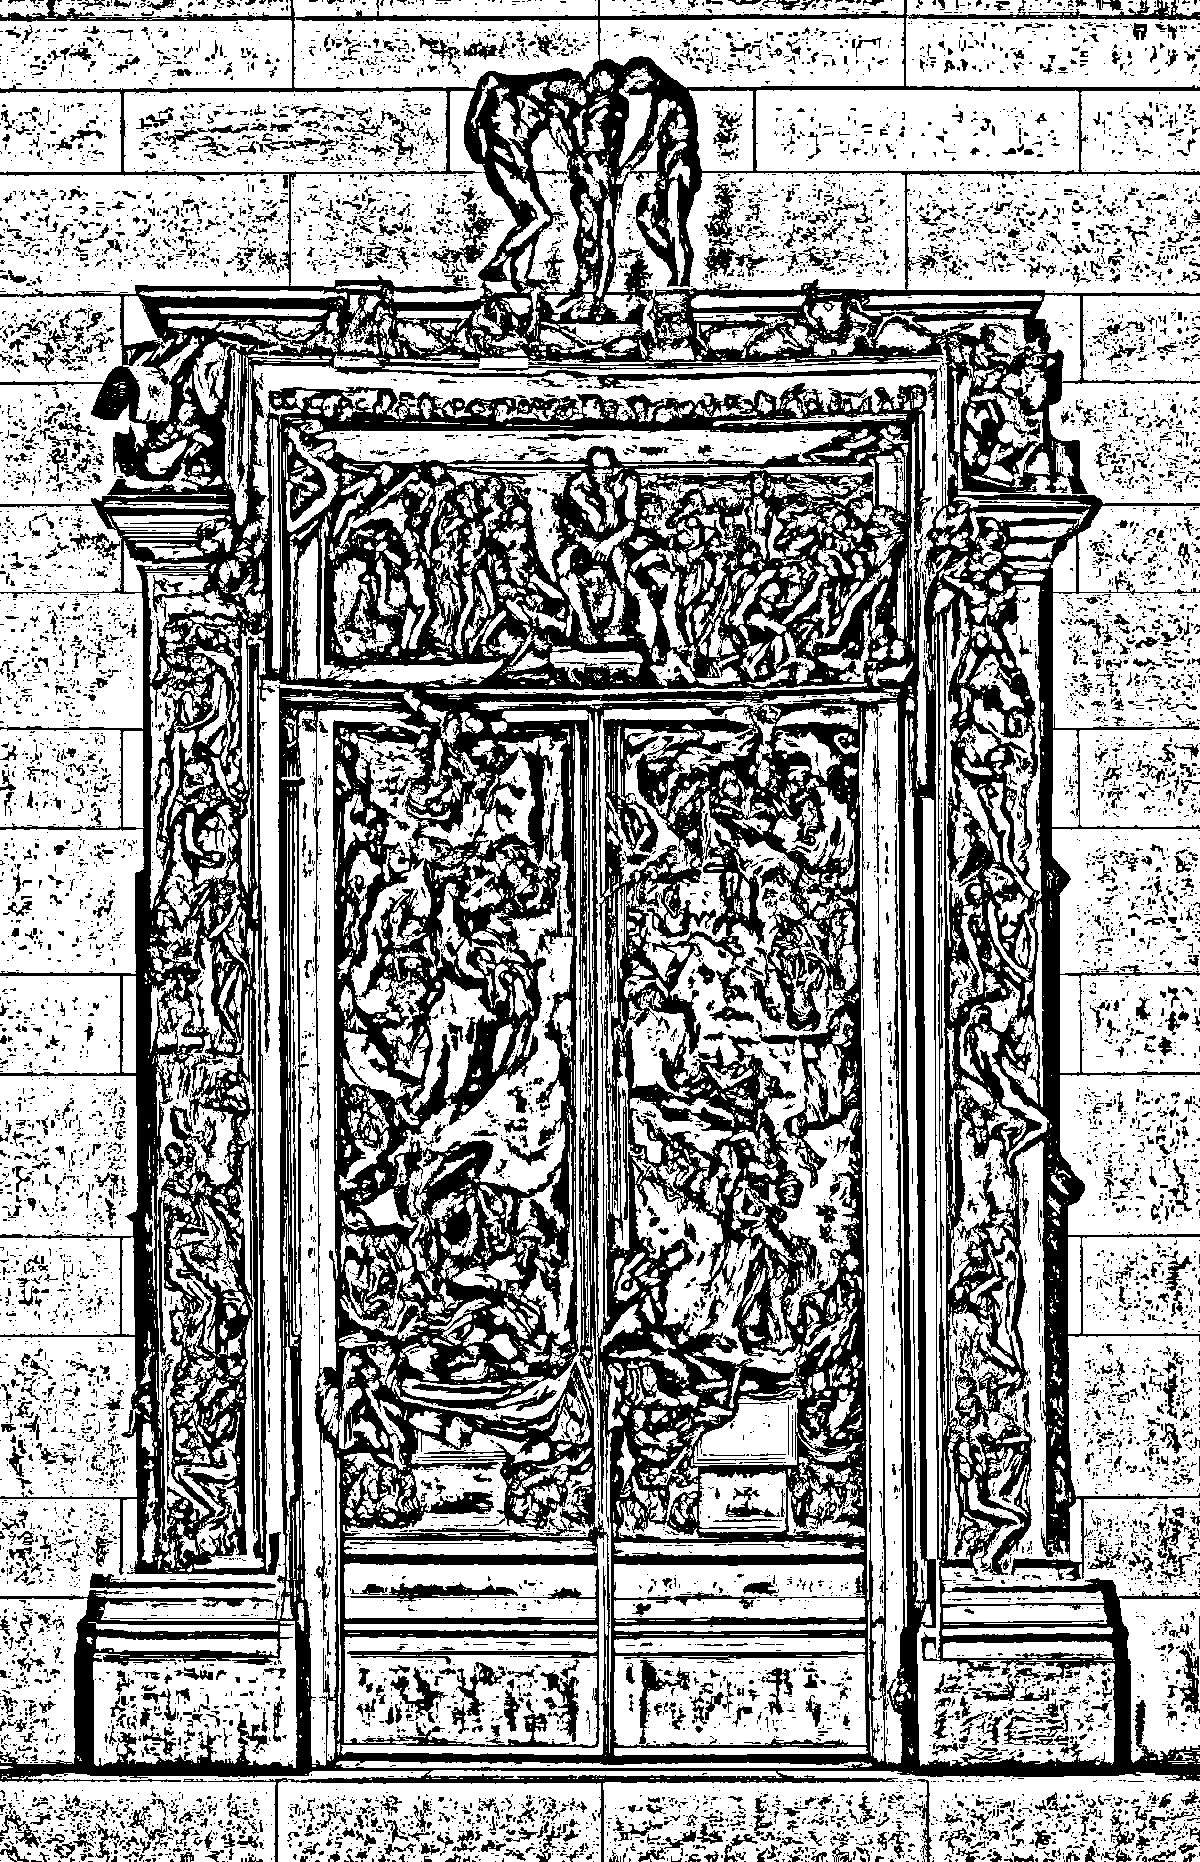

In [221]:
# reference: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
gray = cv.imread("data/gates_of_hell.jpeg", 0)
# gray = cv.medianBlur(gray, 3)
bw = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 51, 2)
utils.display(bw)

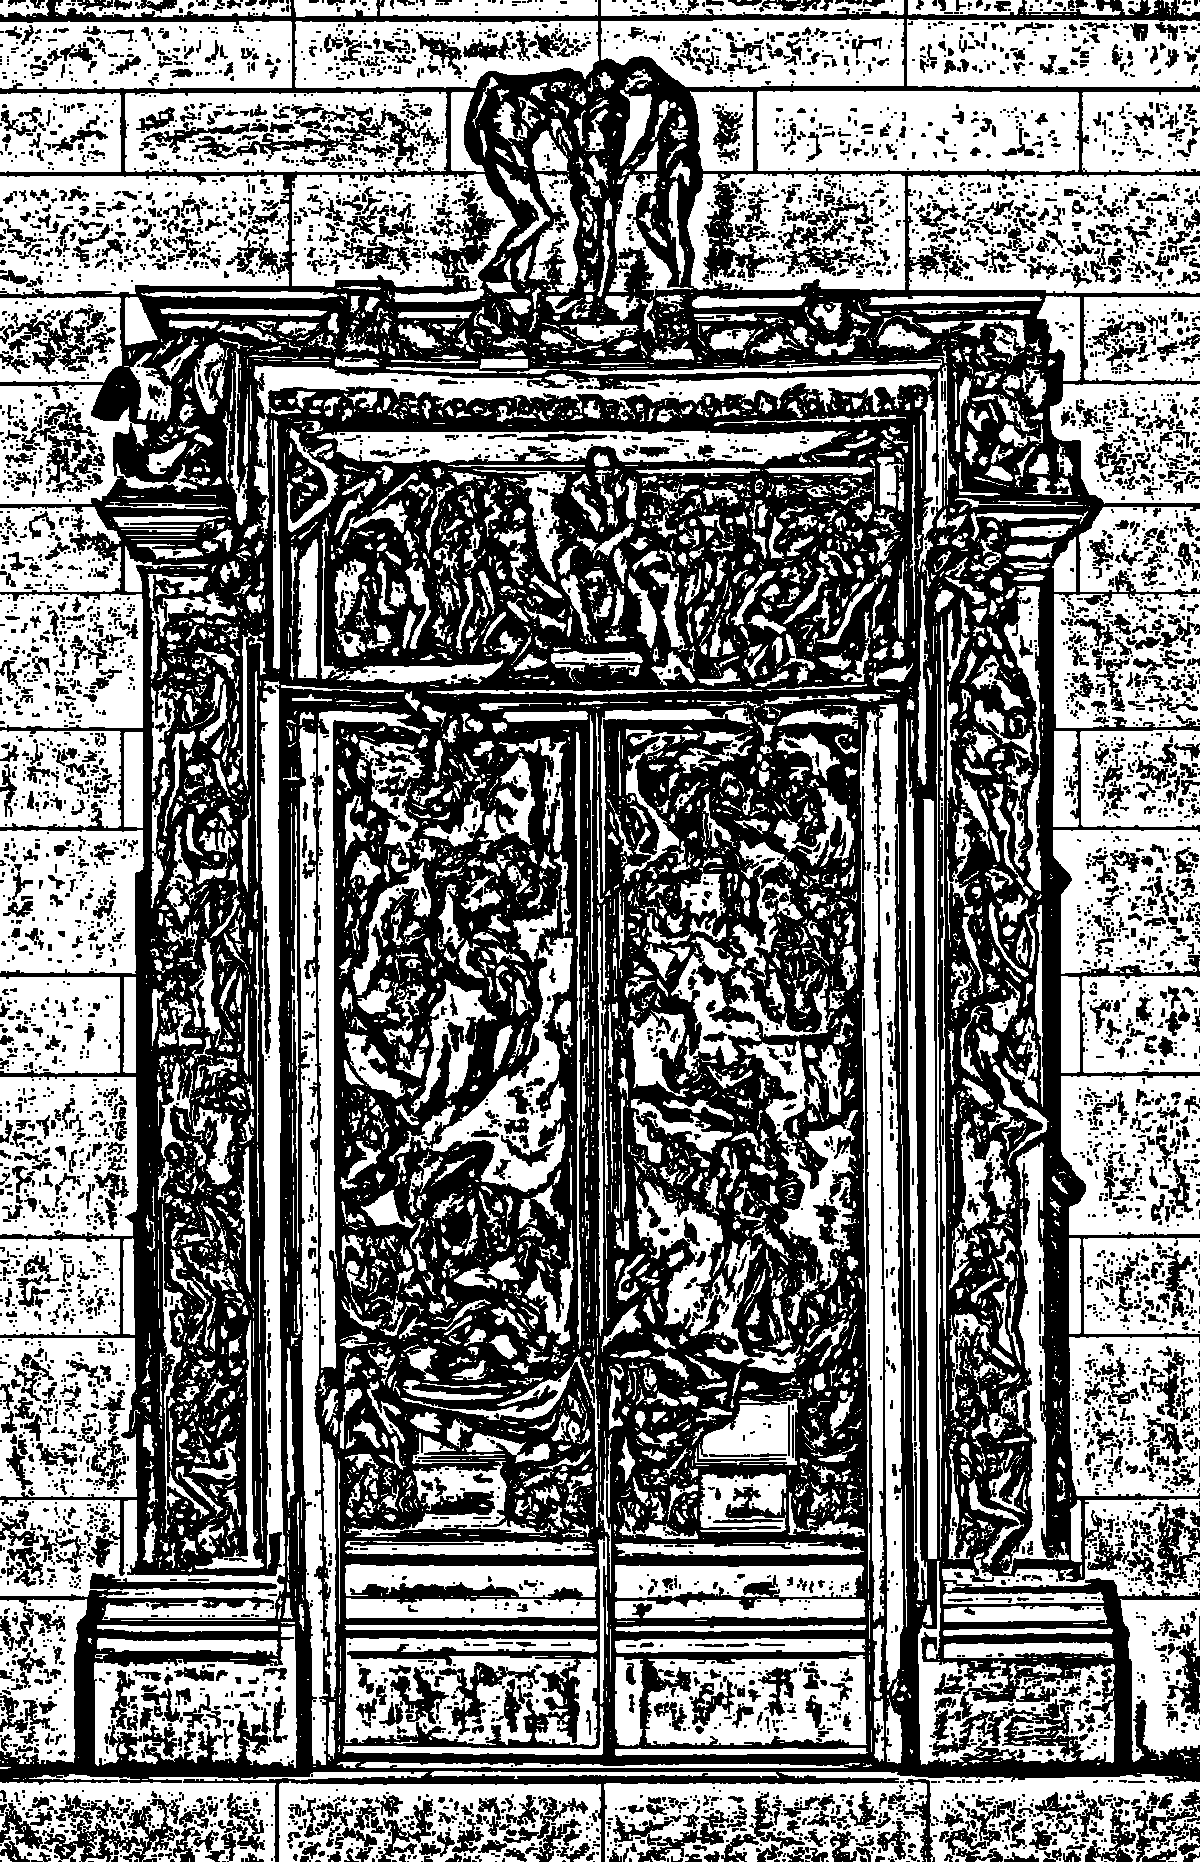

In [222]:
dilation = cv.dilate(bw, np.ones((2, 2), np.uint8), iterations=1)
utils.display(dilation)

  0%|          | 0/1392517 [00:00<?, ?it/s]

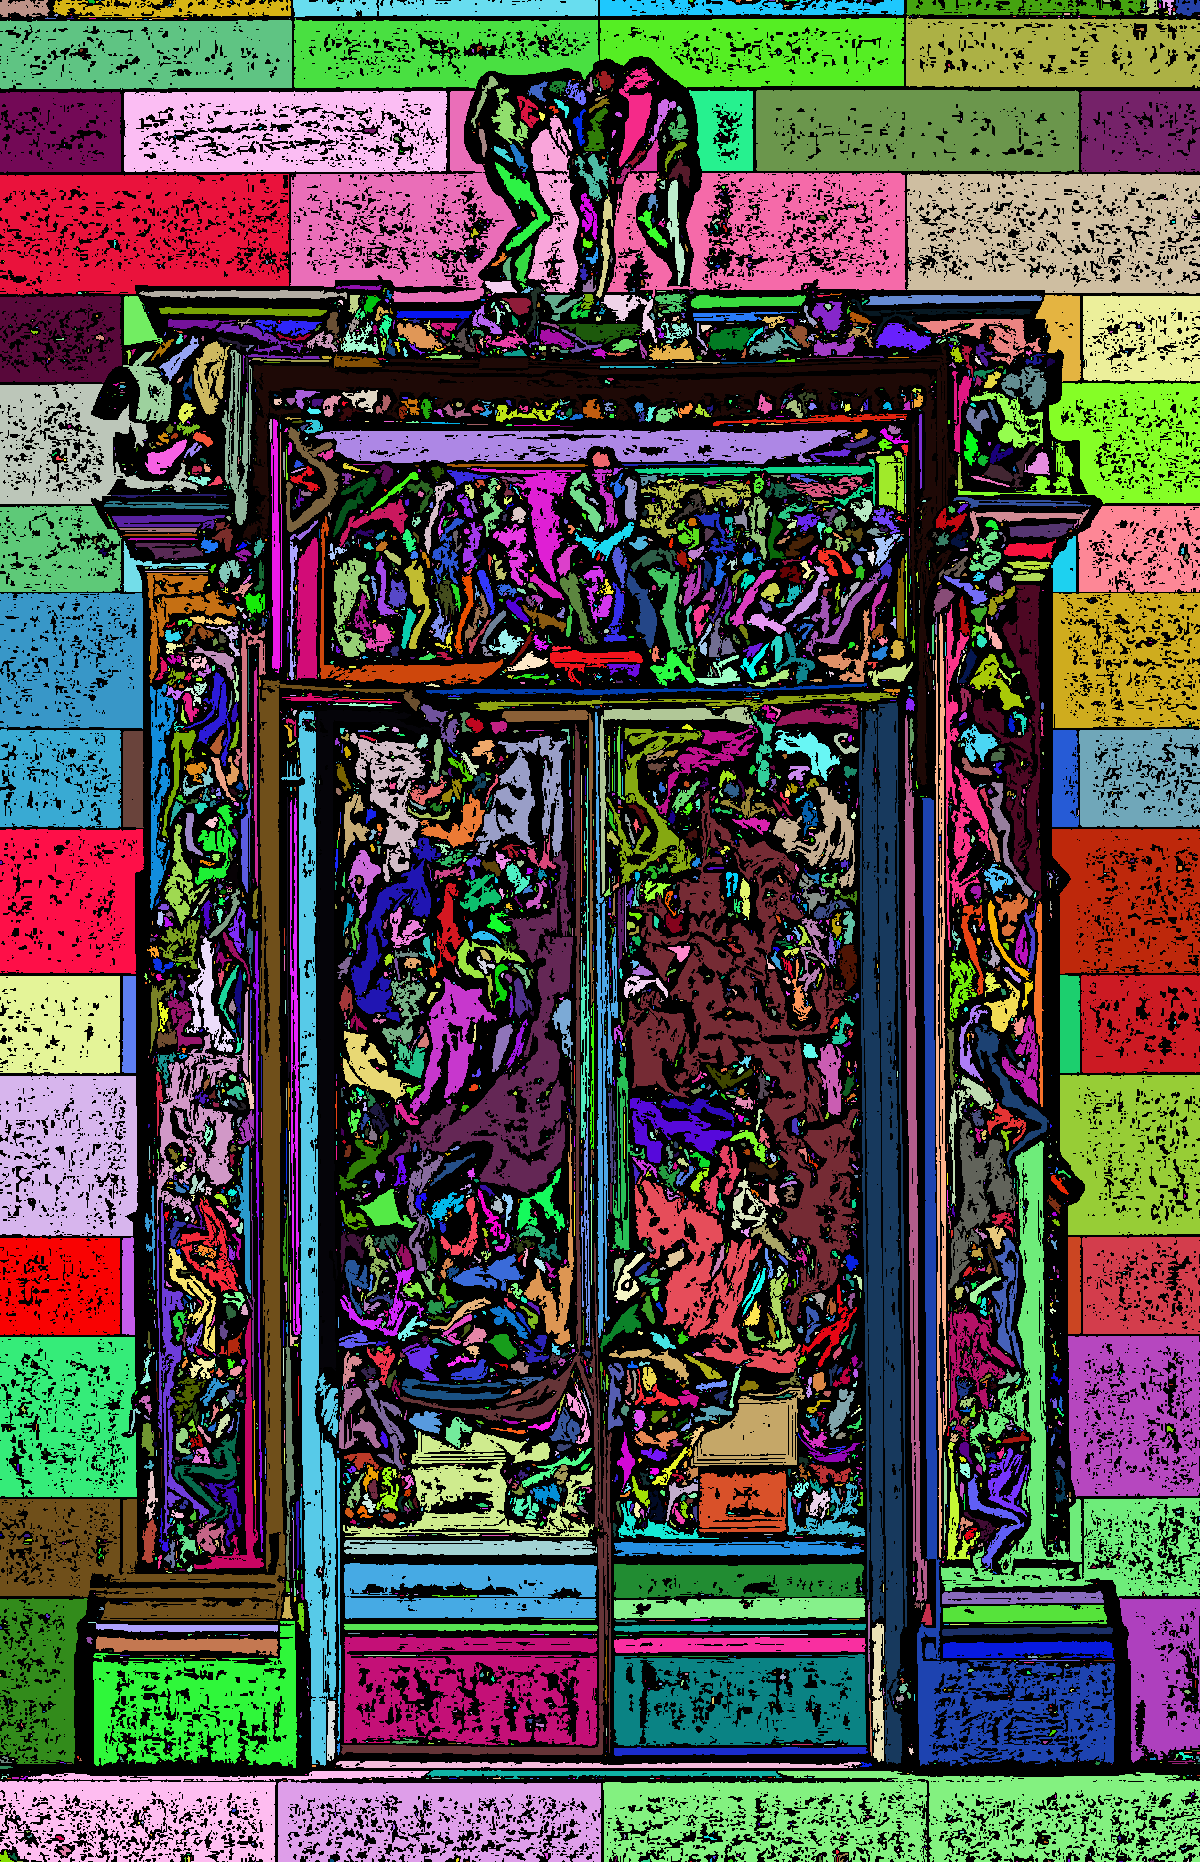

In [223]:
colored = utils.fillcolor(bw, False)
utils.display(colored)

In [230]:
global_otsu_threshold, _ = utils.get_global_otsu_threshold(gray)
background_mask = gray >= global_otsu_threshold

In [236]:
original = cv.imread("data/gates_of_hell.jpeg")
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)

  0%|          | 0/1862 [00:00<?, ?it/s]

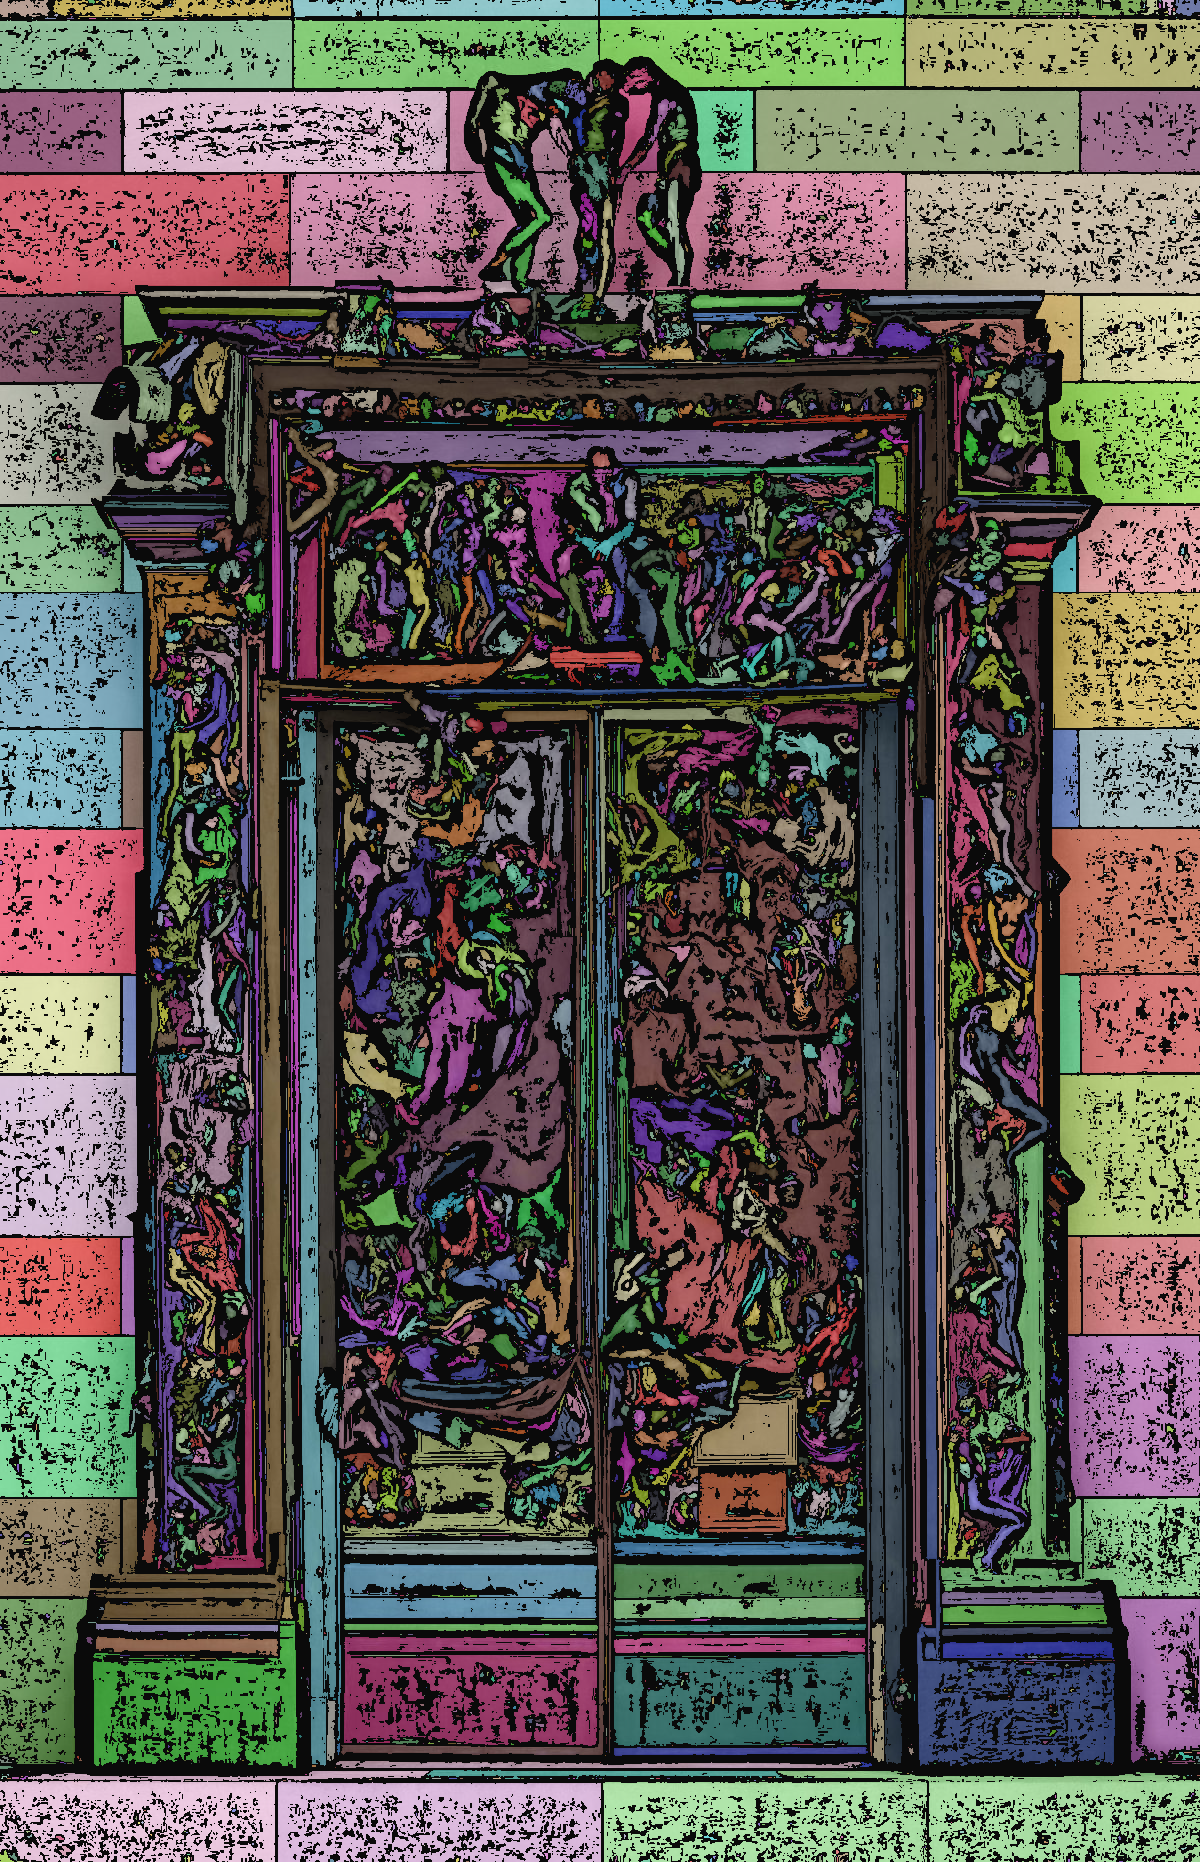

In [249]:
color_adjusted = np.empty_like(colored)
for i, row in enumerate(tqdm(colored)):
    for j, pixel in enumerate(row):
        adjusted = (pixel + original[i, j]) / 2
        color_adjusted[i, j] = adjusted
color_adjusted[bw == 0] = 10
utils.display(color_adjusted)